### Task 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

### Task 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [3]:
# Assign it to a variable with appropriate name
df= pd.read_csv('chipotle.tsv', sep='\t')

### Task 3. Print the first 10 entries

In [4]:
df.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Task 4. Print the number of observations in the dataset

In [5]:
print(len(df))

4622


### Task 5. Print the number of columns per entry

In [6]:
print(len(df.columns))

5


### Task 6. Which was the most ordered item

In [7]:
# Note that just counting the number of times each item has occured in the table isn't
# enough because the quantity ordered isn't necessarily constant
df_groupby= df.groupby(['item_name'])
max_ordered= df_groupby['quantity'].sum().idxmax()
print(max_ordered)


Chicken Bowl


### Task 7. How many times was the above item ordered? Also find the quantity ordered

In [8]:
times_ordered= df_groupby['quantity'].get_group('Chicken Bowl').value_counts().sum()
print(times_ordered)
quantity= df_groupby['quantity'].sum().max()
print(quantity)

726
761


C:\Users\Tanvi\AppData\Local\Temp\ipykernel_24808\2357552421.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  times_ordered= df_groupby['quantity'].get_group('Chicken Bowl').value_counts().sum()


### Task 8. Observe the item price type. You might need values of this column for numerical calculations. Make any necessary adjustments to the column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Task 9. How much was the revenue for the period in the dataset?

In [10]:
df['item_price']= pd.to_numeric(df['item_price'].str.replace('$', '', regex=False),
        errors='coerce')
print(df['item_price'].sum())

34500.16


### Task 10. How many orders were made in the period?

In [11]:
print(len(df))

4622


### Task 11. What is the average revenue amount per order?

In [12]:
print(df['item_price'].mean())

7.464335785374297


### Task 12. How many products cost more than $8.00

In [13]:
price= df['item_price'] > 8.00
print(df[price].value_counts().sum())

2860


### Task 13. Print a data frame with only two columns item_name and item_price

In [14]:
df2= df[['item_name', 'item_price']]
df2

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75
4619,Chicken Salad Bowl,11.25
4620,Chicken Salad Bowl,8.75


### Task 14. Sort the dataframe by name of the item

In [15]:
print(df2.sort_values(by='item_name'))


              item_name  item_price
3389  6 Pack Soft Drink       12.98
341   6 Pack Soft Drink        6.49
1849  6 Pack Soft Drink        6.49
1860  6 Pack Soft Drink        6.49
2713  6 Pack Soft Drink        6.49
...                 ...         ...
2384  Veggie Soft Tacos        8.75
781   Veggie Soft Tacos        8.75
2851  Veggie Soft Tacos        8.49
1699  Veggie Soft Tacos       11.25
1395  Veggie Soft Tacos        8.49

[4622 rows x 2 columns]


### Task 15. What was the quantity of the most expensive item ordered?

In [16]:
print(df.loc[df['item_price'].idxmax(), 'quantity'])

15


### Task 16. How many times did someone order more than one Canned Soda?

In [17]:
soda= (df['item_name']== 'Canned Soda') & (df['quantity']>1 )
print(df[soda].value_counts().sum())

20


### Task 17. How many times was a Veggie Salad Bowl ordered?

In [18]:
print(df_groupby.get_group('Veggie Salad Bowl').value_counts().sum())

18


C:\Users\Tanvi\AppData\Local\Temp\ipykernel_24808\2087514474.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  print(df_groupby.get_group('Veggie Salad Bowl').value_counts().sum())


### Task 18. Set the values of the first 3 rows from quantity as NaN

In [19]:
df.loc[[0,1,2], 'quantity']= np.nan

### Task 19. Now set the value of the rows 3 and 4 of item_price as NaN

In [20]:
df.loc[[3,4], 'item_price']= np.nan
df

,order_id,quantity,item_name,choice_description,item_price
0,1,NaN,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,NaN,Izze,[Clementine],3.39
2,1,NaN,Nantucket Nectar,[Apple],3.39
3,1,1.0,Chips and Tomatillo-Green Chili Salsa,NaN,NaN
4,2,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",NaN
...,...,...,...,...,...
4617,1833,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Task 20. Fill the NaN's with 2 in column quantity and 7 in column item_price

In [21]:
print(df['quantity'].isna())
df.loc[df['quantity'].isna(), 'quantity']=2
df.loc[df['item_price'].isna(), 'item_price']=7




0        True
1        True
2        True
3       False
4       False
        ...  
4617    False
4618    False
4619    False
4620    False
4621    False
Name: quantity, Length: 4622, dtype: bool


### Task 21. Create an array of size 10 with random values from 0 to len(DataFrame)-1   (both inclusive). Ensure that all the values are unique

In [22]:
np.random.seed(31)
arr= np.random.choice(len(df), size=10, replace=False)
print(arr)

[1724 3207 3723 3217 2016  557 3815 3415 3247 3633]


### Task 22. Set all columns to NaN using the random numbers generated as indices

In [23]:
df.loc[arr]= np.nan


### Task 23. How many missing values are there in total in this dataframe?

In [24]:
print(df.isna().sum())

order_id                10
quantity                10
item_name               10
choice_description    1253
item_price              10
dtype: int64


### Task 24. Delete the rows that contain missing values

In [25]:
df.dropna(inplace=True)
df

,order_id,quantity,item_name,choice_description,item_price
1,1.0,2.0,Izze,[Clementine],3.39
2,1.0,2.0,Nantucket Nectar,[Apple],3.39
4,2.0,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",7.00
5,3.0,1.0,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4.0,1.0,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
...,...,...,...,...,...
4617,1833.0,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833.0,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834.0,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834.0,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Task 25.  Reset the index, so it starts with 0 again

In [26]:
df.reset_index()

,index,order_id,quantity,item_name,choice_description,item_price
0,1,1.0,2.0,Izze,[Clementine],3.39
1,2,1.0,2.0,Nantucket Nectar,[Apple],3.39
2,4,2.0,2.0,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",7.00
3,5,3.0,1.0,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
4,7,4.0,1.0,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
...,...,...,...,...,...,...
3364,4617,1833.0,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
3365,4618,1833.0,1.0,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
3366,4619,1834.0,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
3367,4620,1834.0,1.0,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Task 26. Create a histogram of the top 5 items bought

item_name
Chicken Bowl         724
Chicken Burrito      553
Steak Burrito        367
Canned Soft Drink    299
Steak Bowl           211
Name: count, dtype: int64


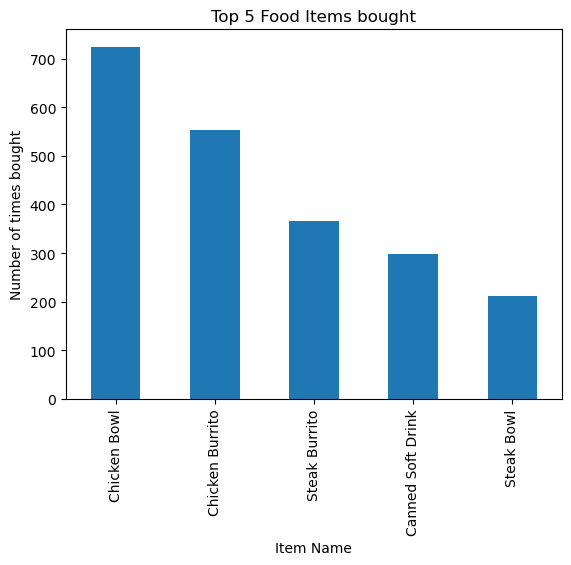

In [27]:
top5= df['item_name'].value_counts().head(5)
print(top5)
import matplotlib.pyplot as plt
top5.plot(kind='bar')
plt.xlabel('Item Name')
plt.ylabel('Number of times bought')
plt.title('Top 5 Food Items bought')
plt.show()

### Task 27. Create a scatterplot with the number of items ordered per order price

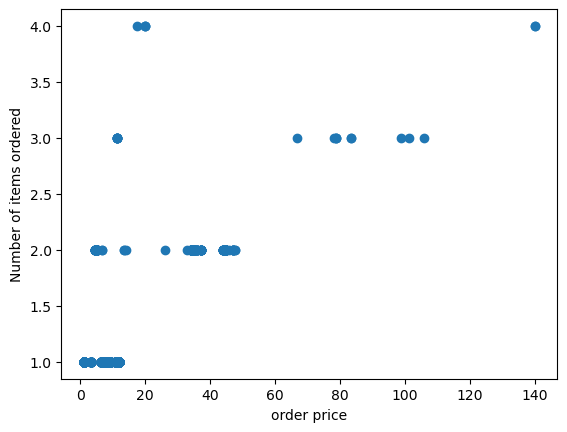

In [28]:
df['order_price']= df['item_price']*df['quantity']
plt.scatter(df['order_price'], df['quantity'])
plt.xlabel('order price')
plt.ylabel('Number of items ordered')
plt.show()
